In [22]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from matplotlib import style
style.use('dark_background')
from IPython import display
import seaborn as sns
import pandas as pd

# Load Dataset

In [23]:
iris = sns.load_dataset('iris')
iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [24]:
iris.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

# Extracting Features and Labels and Transform them to Tensors

In [25]:
X = torch.tensor(iris.iloc[:,:-1].values, dtype = torch.float32)

In [26]:
X

tensor([[5.1000, 3.5000, 1.4000, 0.2000],
        [4.9000, 3.0000, 1.4000, 0.2000],
        [4.7000, 3.2000, 1.3000, 0.2000],
        [4.6000, 3.1000, 1.5000, 0.2000],
        [5.0000, 3.6000, 1.4000, 0.2000],
        [5.4000, 3.9000, 1.7000, 0.4000],
        [4.6000, 3.4000, 1.4000, 0.3000],
        [5.0000, 3.4000, 1.5000, 0.2000],
        [4.4000, 2.9000, 1.4000, 0.2000],
        [4.9000, 3.1000, 1.5000, 0.1000],
        [5.4000, 3.7000, 1.5000, 0.2000],
        [4.8000, 3.4000, 1.6000, 0.2000],
        [4.8000, 3.0000, 1.4000, 0.1000],
        [4.3000, 3.0000, 1.1000, 0.1000],
        [5.8000, 4.0000, 1.2000, 0.2000],
        [5.7000, 4.4000, 1.5000, 0.4000],
        [5.4000, 3.9000, 1.3000, 0.4000],
        [5.1000, 3.5000, 1.4000, 0.3000],
        [5.7000, 3.8000, 1.7000, 0.3000],
        [5.1000, 3.8000, 1.5000, 0.3000],
        [5.4000, 3.4000, 1.7000, 0.2000],
        [5.1000, 3.7000, 1.5000, 0.4000],
        [4.6000, 3.6000, 1.0000, 0.2000],
        [5.1000, 3.3000, 1.7000, 0

In [27]:
y = torch.zeros(len(X), dtype = torch.long)
y[iris.species == 'setosa'] = 0
y[iris.species == 'versicolor'] = 1
y[iris.species == 'virginica'] = 2

In [28]:
X.shape

torch.Size([150, 4])

In [29]:
y

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2])

# Creating Neural Network

In [ ]:
# model = nn.Sequential(
#           nn.Linear(4,32),
#           nn.ReLU(),
#           nn.Linear(32,32),
#           nn.ReLU(),
#           nn.Linear(32,3),
#           )

In [30]:
class NN_Classifier(nn.Module):
  def __init__(self):
    super().__init__()

    self.input = nn.Linear(4,32)
    self.fc = nn.Linear(32,32)

    # Classification OR  output layer

    self.output = nn.Linear(32,3)

  # Forward pass

  def forward(self,x):

    # Pass the data through the input layer

    x = self.input(x)
    x = self.fc(x)

    # Apply ReLU activation

    x = F.relu(x)

    # output layer

    x = self.output(x)
    X = torch.sigmoid # This is not necessary because we are using cross entropy loss which already contains sigmoid.
    return x

# Create the instance of the model

In [31]:
model = NN_Classifier()

# Training The Model

In [32]:
learningRate = 0.01
lossfunc = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learningRate)

epochs = 3501
losses = torch.zeros(epochs) # setting place holder for for loop.
for epoch in range(epochs):

    ypred = model(X)
    loss = lossfunc(ypred, y)
    losses[epoch] = loss.detach()

    if (epoch % 200) == 0:

        print(f' epochs : {epoch}  loss : {loss : 2.2f}')

    # Backpropagation

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()


accuracy = 100 * torch.mean((torch.argmax(ypred, axis = 1) == y).float())


 epochs : 0  loss :  1.17
 epochs : 200  loss :  0.45
 epochs : 400  loss :  0.26
 epochs : 600  loss :  0.16
 epochs : 800  loss :  0.12
 epochs : 1000  loss :  0.10
 epochs : 1200  loss :  0.09
 epochs : 1400  loss :  0.08
 epochs : 1600  loss :  0.08
 epochs : 1800  loss :  0.07
 epochs : 2000  loss :  0.07
 epochs : 2200  loss :  0.07
 epochs : 2400  loss :  0.06
 epochs : 2600  loss :  0.06
 epochs : 2800  loss :  0.06
 epochs : 3000  loss :  0.06
 epochs : 3200  loss :  0.06
 epochs : 3400  loss :  0.06


In [33]:
accuracy

tensor(97.3333)

# Visualizing Loss Vs Epochs

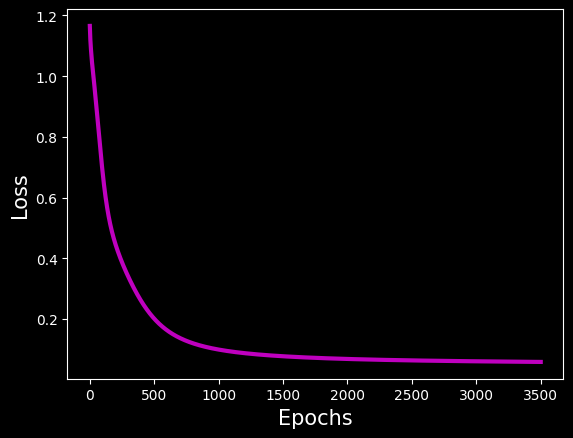

In [34]:
plt.plot(losses,'m', lw =3)
plt.xlabel('Epochs', fontsize = 15)
plt.ylabel('Loss', fontsize = 15)
plt.show()

# Understanding Calculation of Accuracy

In [ ]:
accuracy = 100 * torch.mean((torch.argmax(ypred, axis = 1) == y).float())

In [35]:
ypred  # Score of model Corresponding to the probability

tensor([[ 16.1831,   8.6702, -26.1924],
        [ 14.5997,   7.9292, -23.8022],
        [ 14.9657,   8.0373, -24.2575],
        [ 13.8470,   7.6352, -22.6383],
        [ 16.2123,   8.6748, -26.2041],
        [ 15.9777,   8.7865, -26.0873],
        [ 14.6400,   7.8785, -23.7014],
        [ 15.4569,   8.3546, -25.0922],
        [ 13.2964,   7.3144, -21.7342],
        [ 14.8644,   8.0907, -24.2222],
        [ 16.9755,   9.0909, -27.4562],
        [ 14.6964,   8.0475, -23.9476],
        [ 14.7360,   7.9832, -23.9777],
        [ 14.5436,   7.8007, -23.5774],
        [ 19.2089,  10.1906, -31.0609],
        [ 18.5302,   9.8365, -29.8487],
        [ 17.3101,   9.2030, -27.9775],
        [ 15.8686,   8.5052, -25.6988],
        [ 16.7870,   9.1537, -27.3540],
        [ 16.2885,   8.7221, -26.3106],
        [ 15.4369,   8.5951, -25.3573],
        [ 15.7039,   8.4540, -25.4506],
        [ 16.4407,   8.7292, -26.5408],
        [ 13.0005,   7.7446, -21.9155],
        [ 13.2272,   7.7803, -22.1220],


In [36]:
torch.argmax(ypred, axis =1)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
        2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2])

In [37]:
(torch.argmax(ypred, axis =1)==y)

tensor([ True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
        False,  True, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True, False,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True, 

In [38]:
(torch.argmax(ypred, axis =1)==y).float()

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
        0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1.])

In [39]:
torch.mean((torch.argmax(ypred, axis =1)==y).float())

tensor(0.9733)

In [40]:
100 * torch.mean((torch.argmax(ypred, axis =1)==y).float())

tensor(97.3333)